# Kaggle begining : Titanic competition

This notebook's goal is to analyse Titanics's data and predict who will surive in the Kaggle test set.

Competion website [here](https://www.kaggle.com/competitions/titanic)

## General part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 891)
pd.set_option('display.max_column', 12)

In [3]:
data =  pd.read_csv('data/train.csv') 
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

## Exploratory Data Analysis 

**Goal :** Understand data
EDA can be begin on the Kaggle website in the *Data* tab.

**Form :**
- **Target variable :** *Survived* wich show if passenger survived (=1) or not (=0)
- **Lines and columns :** 891 rows × 12 columns
- **Variables' type :** 7 numericals & 2 text. 
- **Missings data :**
  - *cabin* has particulary import missing ratio (> 77%)
  - *age* has some missings values (19.8%) -> drop NaN ? fill with median ?
  - No particular pattern in missings values.


**Content :**
- **Target visualisation :** 38% of passengers survived, 62% died.
- **Variables signification :**
  - *PassengerId* : **droped**
  - *Pclass* : qualitative -> 1 to 3 : passenger class, with half in 3thr and 25% for each else
  - *Name* : **droped**
  - *Sex* : qualitative -> 35% men
  - *Age* : quantitative -> median ~ 25 yo
  - *Sibsp* : quantitative -> siblings or spouse
  - *Parch* : quantitative -> parents or childs
  
  NB : 60% passengers was alone
  - *Ticket* : qualitative -> some passengers seems to have the same ticket
  - *Fare* : quantitative -> some outliers > 200
  - *Cabin* : cabin id
  - *Embarked* : qualitative -> port of embarkation : C = Cherbourg, Q = Queenstown, S = Southampton (majority)
- **Variables/Target relations :**
  - Pclass: 1st class seems to has more chance to survive and 3rd many more to die
  - Sex : woomen seems to has more chance to survive
  - Age : nothing noticeable for age even for 0-5 yo who seems to has more chance to survive
  - Sibsp & Parch : passenger who has 1 or 2 sibsp seems to has more chance to survive ; for parch : 1,2,3 => passenger with [1,3] family members seems to had more chance to survive
  - Fare : passenger who has buy ticket at low cost (3thr class ?) seems to have less chance to survive
  - Ticket & Cabin : ticket and cabins seems to be attributed to 1st class, then 2nd, then 3rd
  - Embarked : passenger from Southampton seems to have less chance to survive

**Advanced part :**
- **Variables/Variables relations :**
*nb1 : family is composed by Sibsp and Parch*
*nb2 : large family when passenger had at least 4 other passengers*
  - family / family : non significant correlation
  - embarked / pclass : no more 3rd in S than Q. But more 1st in C
  - embarked / sex : S had more men
  - embarked / family : seems to be more large family in S
  - pclass / sex : 3rd class had more men
  - pclass / family : seems to be more large family or alone passengers in 3rd
- **NaN advanced :**
    - when dropping NaN age, we keep the same proportion of surived values (714 val, 40% survived, 60% not)
    - when dropping NaN cabin, we lower the proportion of surived (204 val : 33% survived, 67% not)
    - when dropping both, more lower than cabin
- **Hypothesis** (H0) :
  - Passenger in 3rd class has less chance to survived
    - H0 : ratio of survived are the same in 3rd class than others
    - H0 rejected -> hypothesis ok
  - Woomen has more chance to survived
    - H0 : ratio of survived is the same with men  
    - H0 rejected -> hypothesis ok
  - 0-5 has more chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok
  - Passenger with [1, 3] family members survived together -> No variables permit to link passengers 
  - Passenger with [1, 3] family members has more chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok
  - Passenger from S has less chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok

**Conclusion :**
- No many missing data
- Many discriminant variables

### Form

In [4]:
df_eda = data.copy(deep=True)

In [5]:
df_eda.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

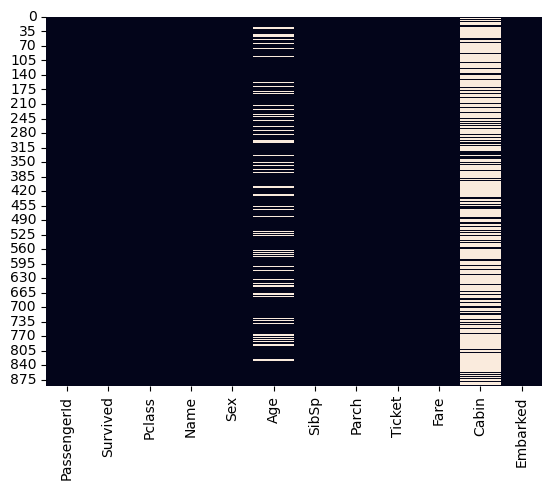

In [6]:
sns.heatmap(df_eda.isna(), cbar=False)

In [7]:
(df_eda.isna().sum()/df_eda.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Content

First : removing useless columns

- *PassengerID* : because ID isn't relevant
- *Name* : same

For now, I don't remove other column because of a possible pattern in *Ticket* number, in *Cabin*, in *Embarked* (port), in *Fare* (price), in *SibSp* (sibling) or *Parch* (Parent/Child).

*Pclass* (passenger class), *Sex* and *Age* has to be tested.

In [8]:
df_eda = df_eda.drop(['PassengerId','Name'],axis=1)
df_eda

Survived  Pclass     Sex    Age  SibSp  Parch              Ticket  \
0           0       3    male  22.00      1      0           A/5 21171   
1           1       1  female  38.00      1      0            PC 17599   
2           1       3  female  26.00      0      0    STON/O2. 3101282   
3           1       1  female  35.00      1      0              113803   
4           0       3    male  35.00      0      0              373450   
5           0       3    male    NaN      0      0              330877   
6           0       1    male  54.00      0      0               17463   
7           0       3    male   2.00      3      1              349909   
8           1       3  female  27.00      0      2              347742   
9           1       2  female  14.00      1      0              237736   
10          1       3  female   4.00      1      1             PP 9549   
11          1       1  female  58.00      0      0              113783   
12          0       3    male  20.00      0      0           A/5. 2151   
13          0       3    male  39.00      1      5              347082   
14          0       3  female  14.00      0      0              350406   
15          1       2  female  55.00      0      0              248706   
16          0       3    male   2.00      4      1              382652   
17          1       2    male    NaN      0      0              244373   
18          0       3  female  31.00      1      0              345763   
19          1       3  female    NaN      0      0                2649   
20          0       2    male  35.00      0      0              239865   
21          1       2    male  34.00      0      0              248698   
22          1       3  female  15.00      0      0              330923   
23          1       1    male  28.00      0      0              113788   
24          0       3  female   8.00      3      1              349909   
25          1       3  female  38.00      1      5              347077   
26          0       3    male    NaN      0      0                2631   
27          0       1    male  19.00      3      2               19950   
28          1       3  female    NaN      0      0              330959   
29          0       3    male    NaN      0      0              349216   
30          0       1    male  40.00      0      0            PC 17601   
31          1       1  female    NaN      1      0            PC 17569   
32          1       3  female    NaN      0      0              335677   
33          0       2    male  66.00      0      0          C.A. 24579   
34          0       1    male  28.00      1      0            PC 17604   
35          0       1    male  42.00      1      0              113789   
36          1       3    male    NaN      0      0                2677   
37          0       3    male  21.00      0      0          A./5. 2152   
38          0       3  female  18.00      2      0              345764   
39          1       3  female  14.00      1      0                2651   
40          0       3  female  40.00      1      0                7546   
41          0       2  female  27.00      1      0               11668   
42          0       3    male    NaN      0      0              349253   
43          1       2  female   3.00      1      2       SC/Paris 2123   
44          1       3  female  19.00      0      0              330958   
45          0       3    male    NaN      0      0     S.C./A.4. 23567   
46          0       3    male    NaN      1      0              370371   
47          1       3  female    NaN      0      0               14311   
48          0       3    male    NaN      2      0                2662   
49          0       3  female  18.00      1      0              349237   
50          0       3    male   7.00      4      1             3101295   
51          0       3    male  21.00      0      0          A/4. 39886   
52          1       1  female  49.00      1      0            PC 17572   
53       

#### Target visualization

In [9]:
df_eda['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

#### Variables visualization

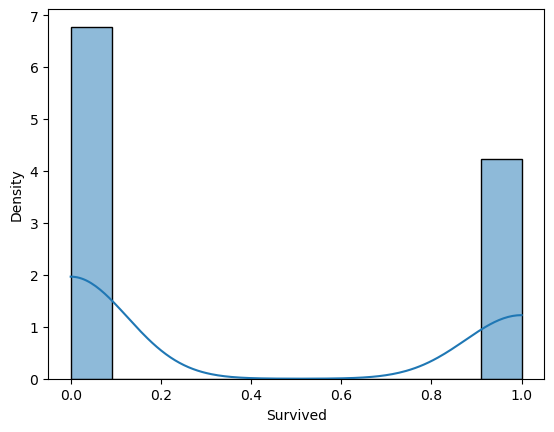

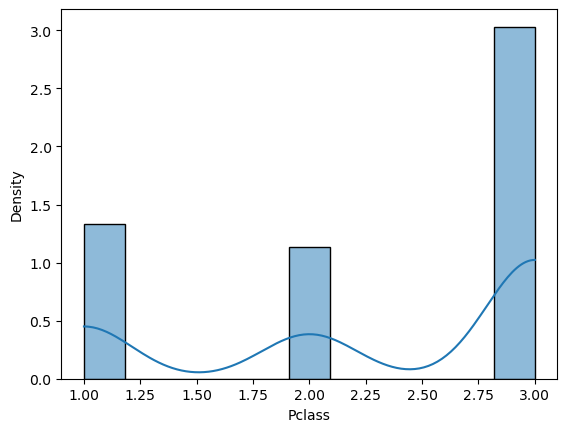

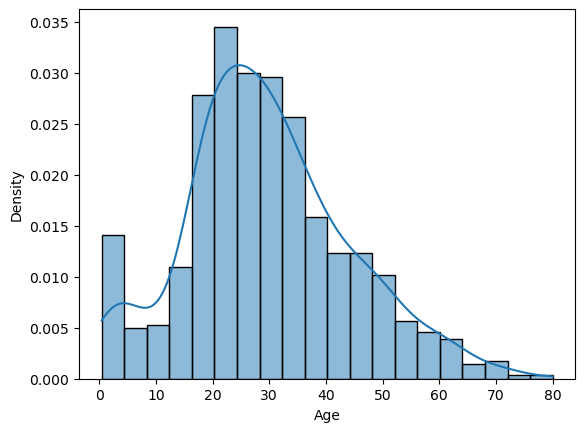

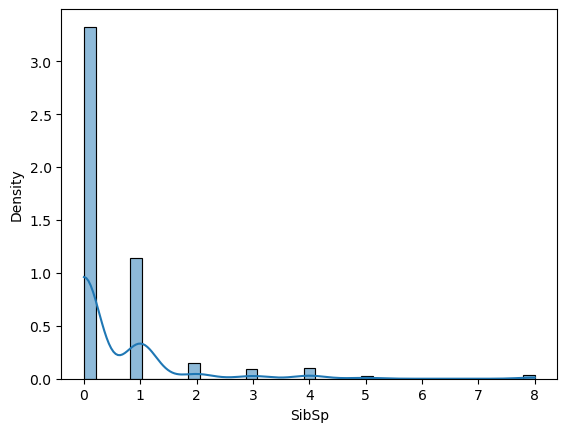

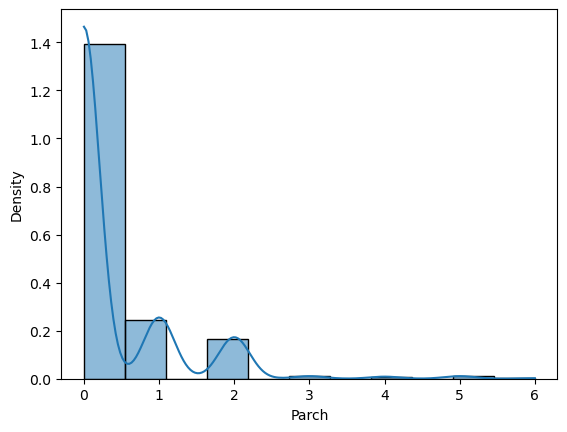

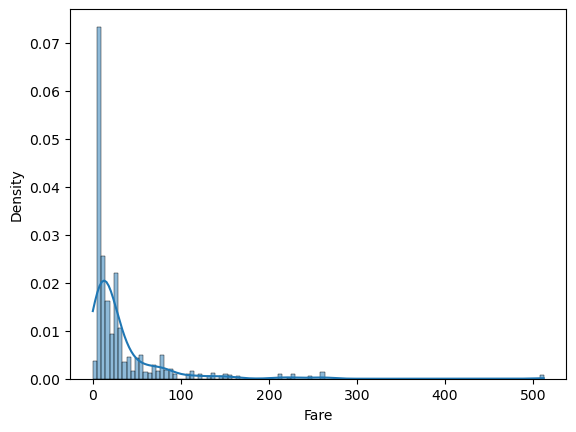

In [10]:
for col in df_eda.select_dtypes(['int64','float64']):
    plt.figure()
    sns.histplot(df_eda[col], kde=True, stat="density")

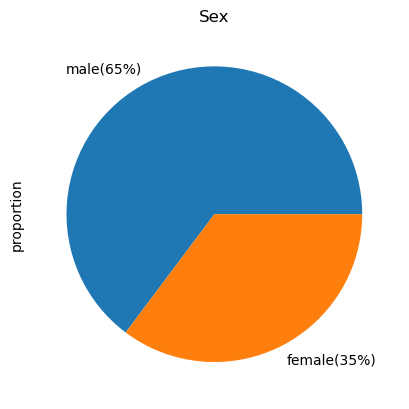

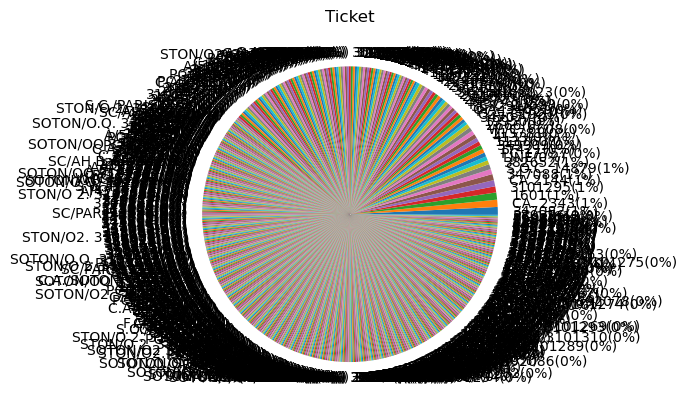

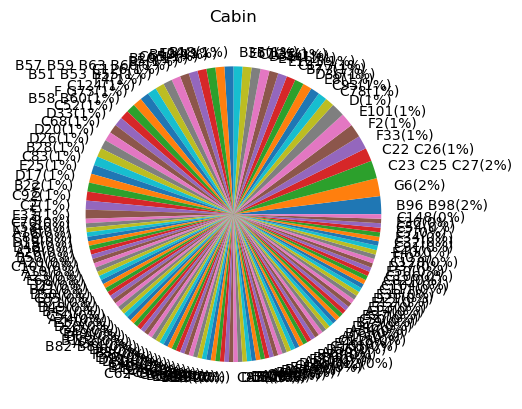

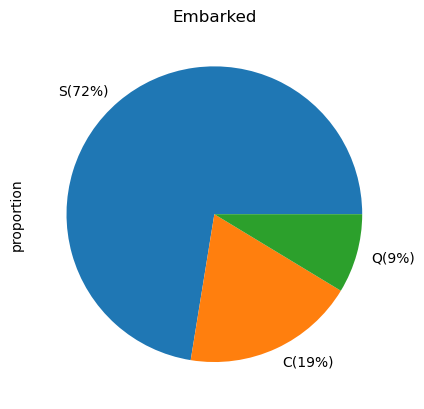

In [11]:
def get_lbl(vc):
    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]

for col in df_eda.select_dtypes(['object']):
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title=col)

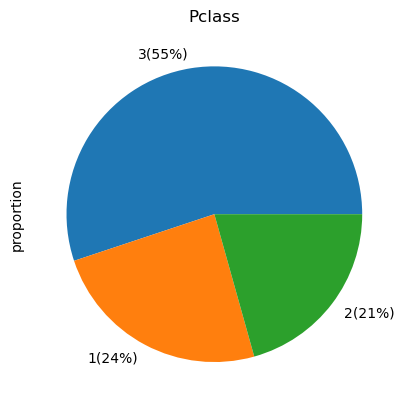

In [12]:
for col in ['Pclass']:
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title = col)

<Axes: >

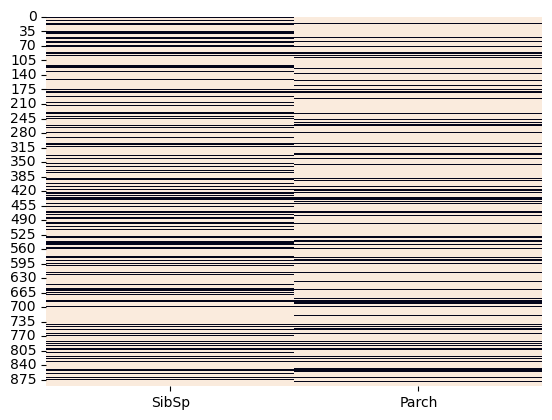

In [13]:
sns.heatmap(df_eda[['SibSp','Parch']] == 0, cbar=False)

In [14]:
# Ratio of alone passengers
tmp = df_eda[['SibSp','Parch']] == 0
tmp = tmp.SibSp & tmp.Parch
tmp.value_counts(normalize=True)

True     0.602694
False    0.397306
Name: proportion, dtype: float64

#### Sub df from target values

In [15]:
df_eda_pos = df_eda[df_eda['Survived'] == 1]
df_eda_pos.shape

(342, 10)

In [16]:
df_eda_neg = df_eda[df_eda['Survived'] == 0]
df_eda_neg.shape

(549, 10)

#### Sub group for family variables

In [17]:
family_cols = ['SibSp','Parch']

In [18]:
all_var_cols = list(df_eda.columns)
all_var_cols.remove('Survived')

#### Relation Var/Target

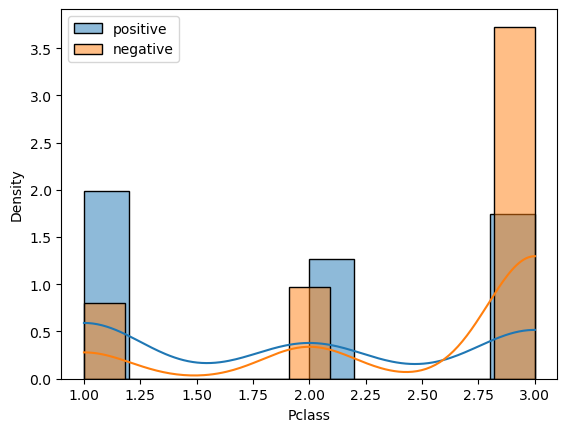

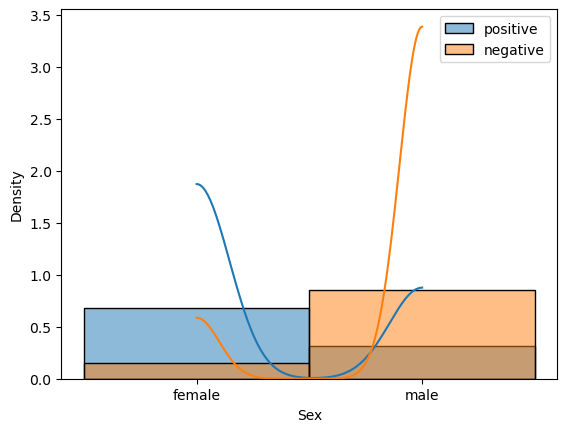

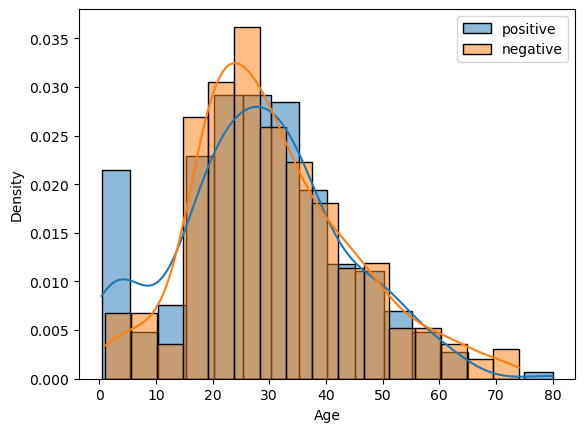

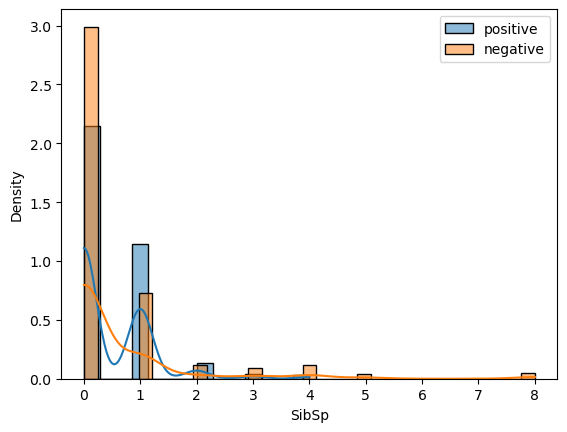

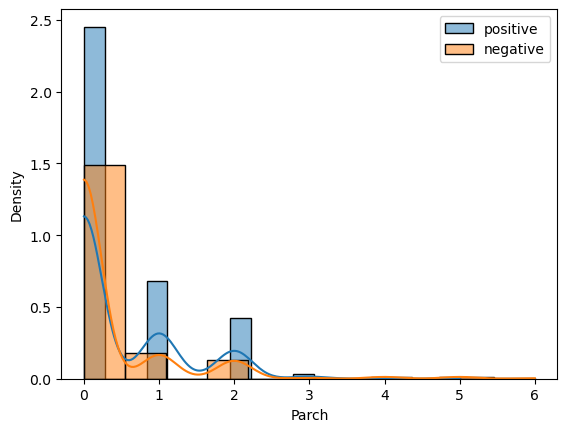

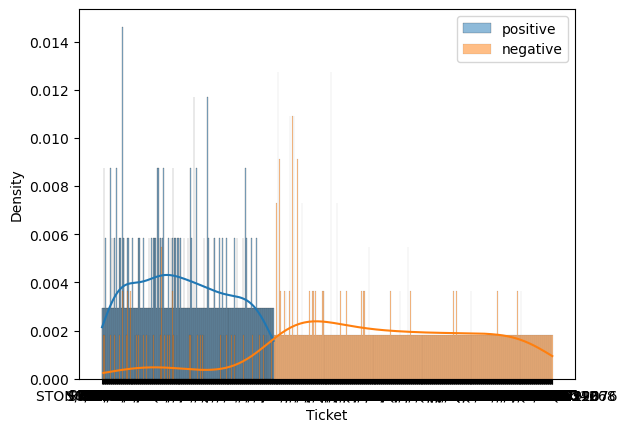

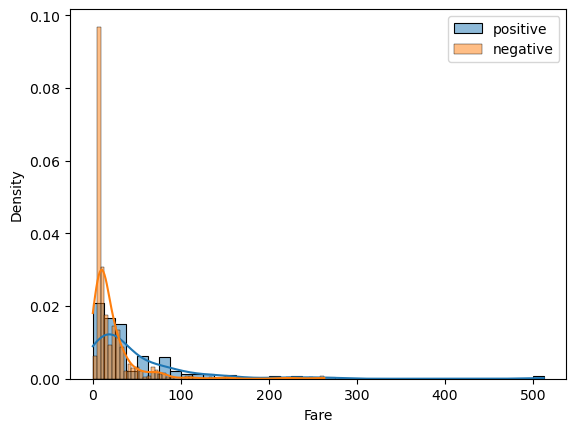

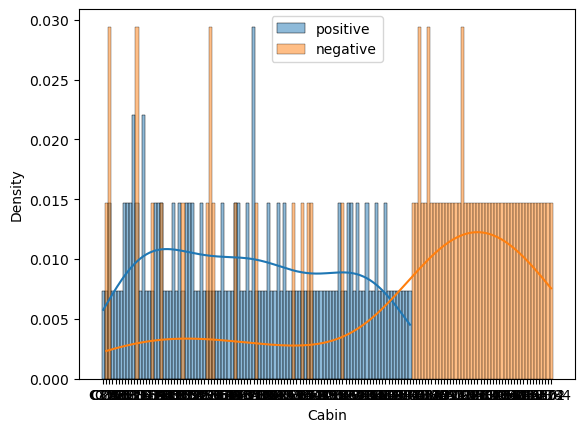

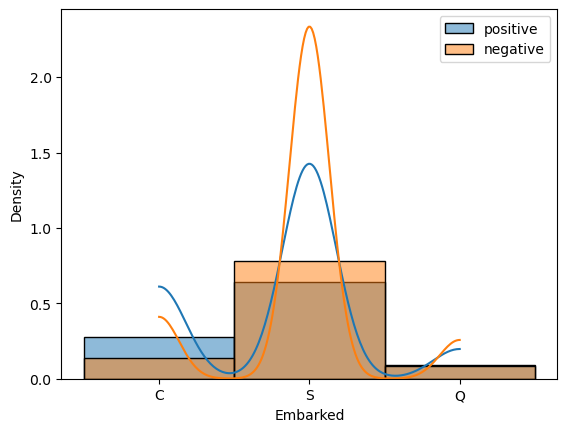

In [19]:
for col in all_var_cols:
    plt.figure()
    sns.histplot(df_eda_pos[col], kde=True, stat="density", label='positive')
    sns.histplot(df_eda_neg[col], kde=True, stat="density", label='negative')
    plt.legend()

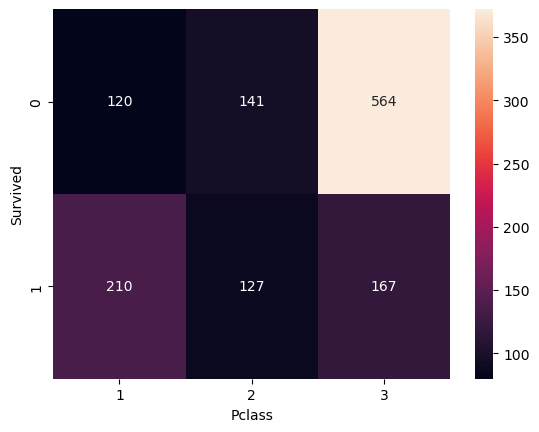

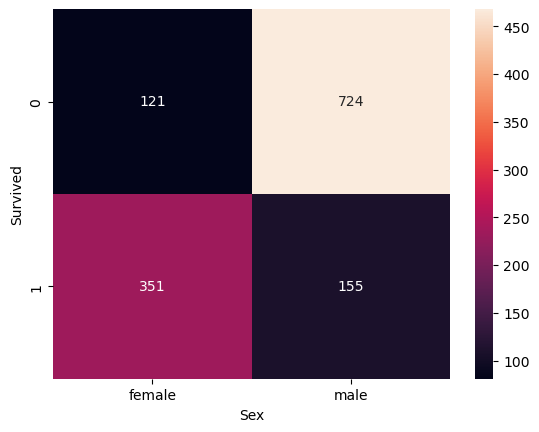

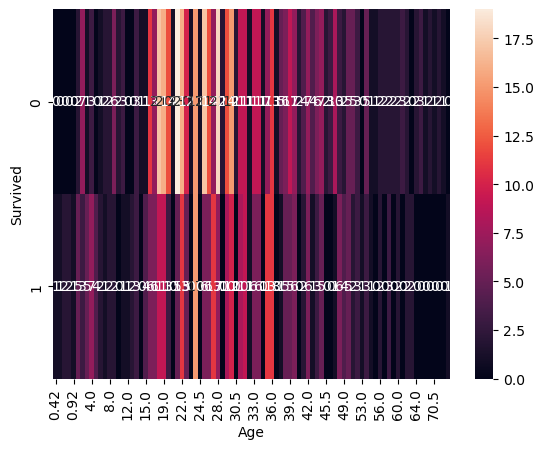

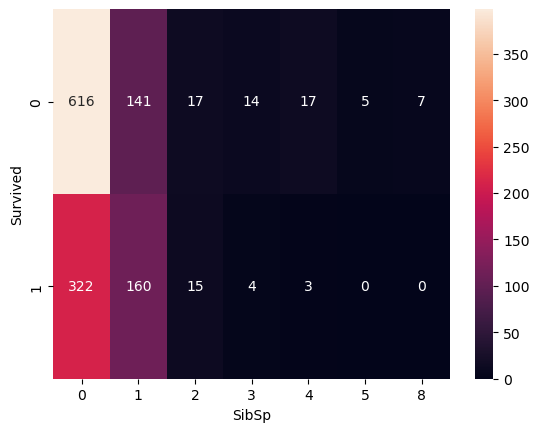

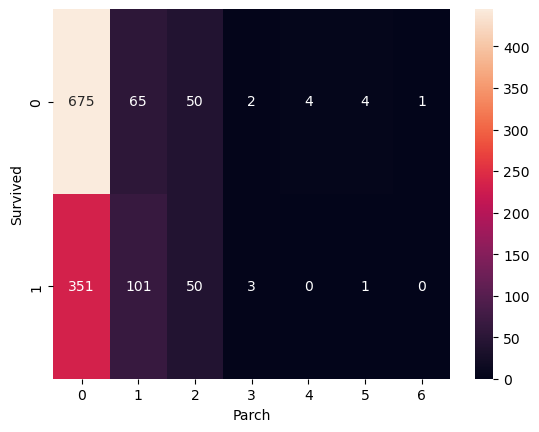

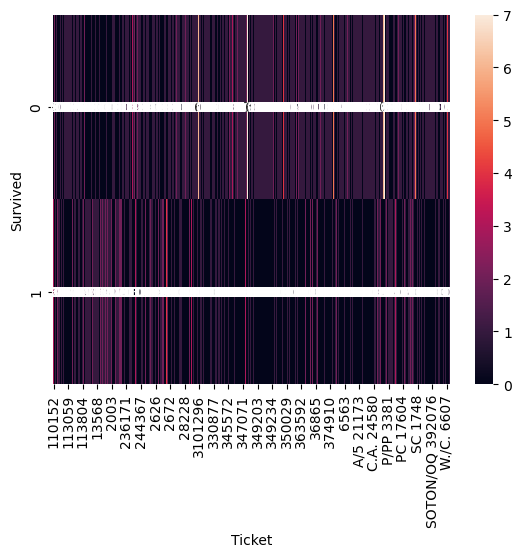

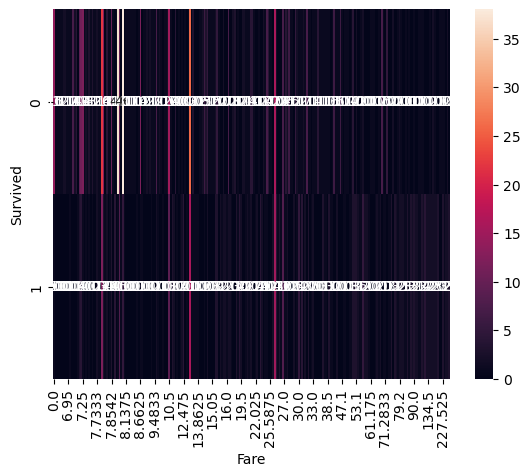

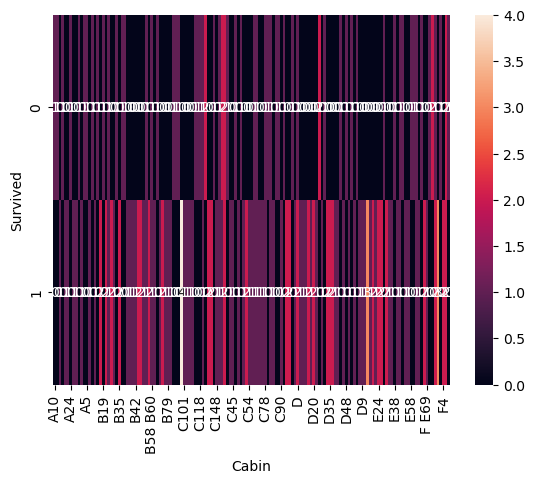

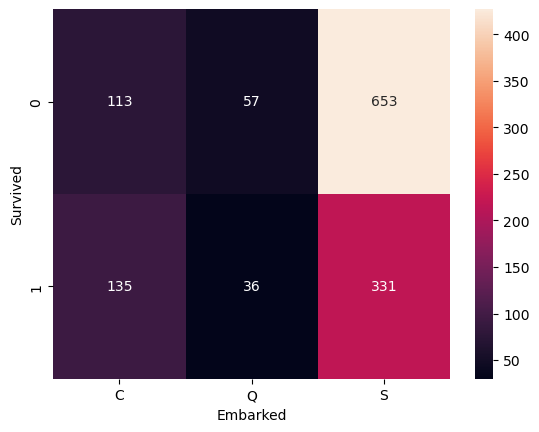

In [20]:
for col in all_var_cols:
    plt.figure()
    sns.heatmap(pd.crosstab(df_eda['Survived'], df_eda[col]), annot=True, fmt='o')

<Axes: xlabel='Embarked', ylabel='count'>

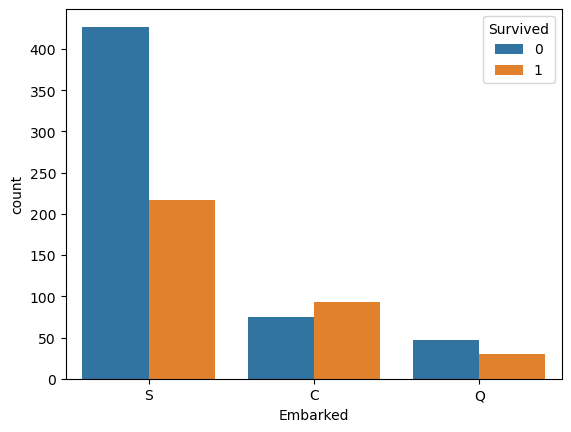

In [21]:
sns.countplot(x='Embarked', hue='Survived', data=df_eda)

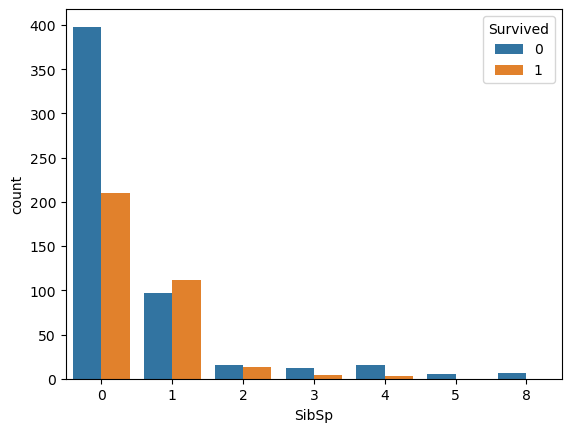

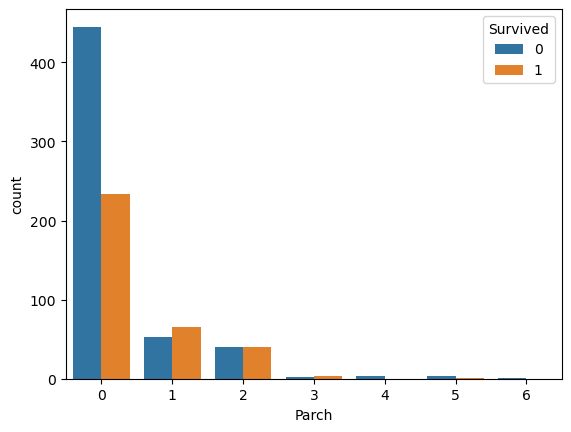

In [22]:
for col in family_cols:
    plt.figure()
    sns.countplot(x=col, hue='Survived', data=df_eda)

### Advenced EDA
#### Relation Var/Var

In [23]:
df_eda[family_cols].corr()

SibSp     Parch
SibSp  1.000000  0.414838
Parch  0.414838  1.000000

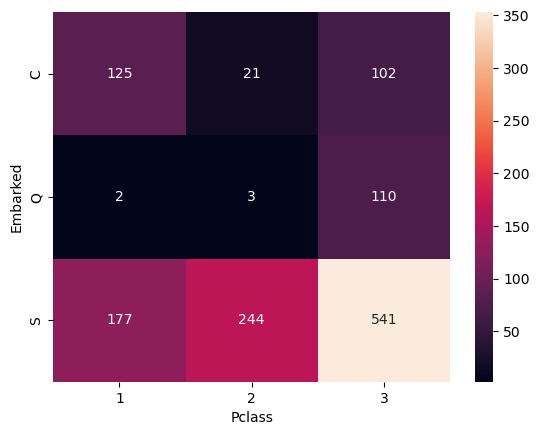

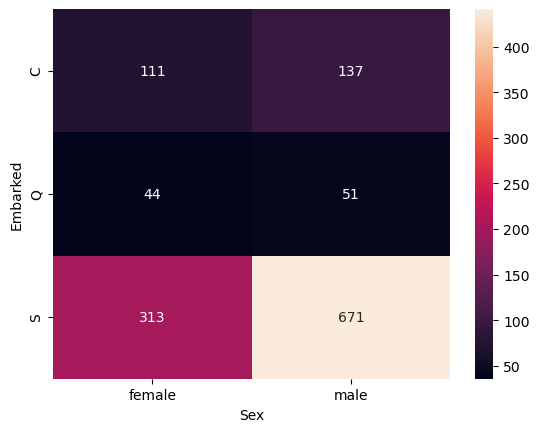

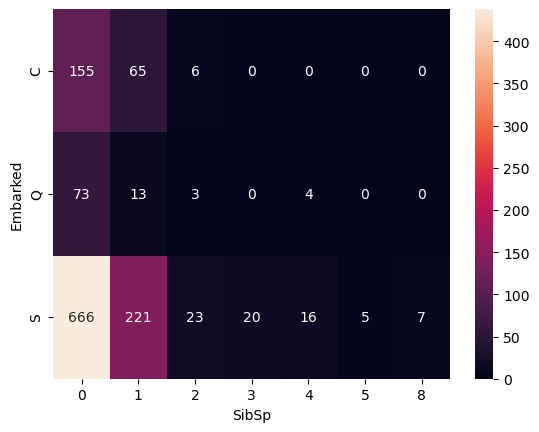

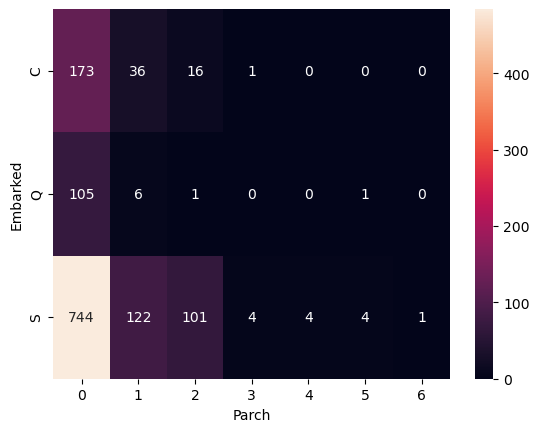

In [24]:
tmp = ['Pclass','Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.heatmap(pd.crosstab(df_eda['Embarked'], df_eda[col]), annot=True, fmt='o')

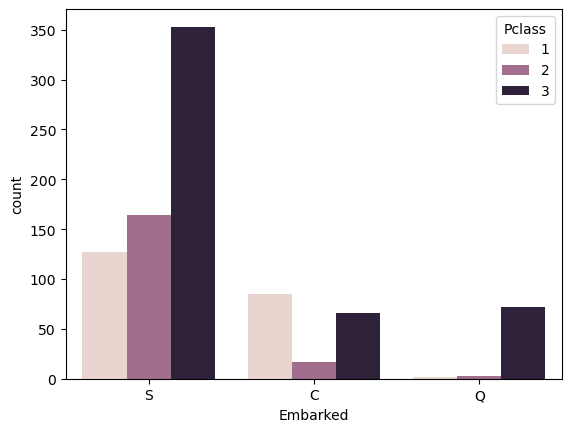

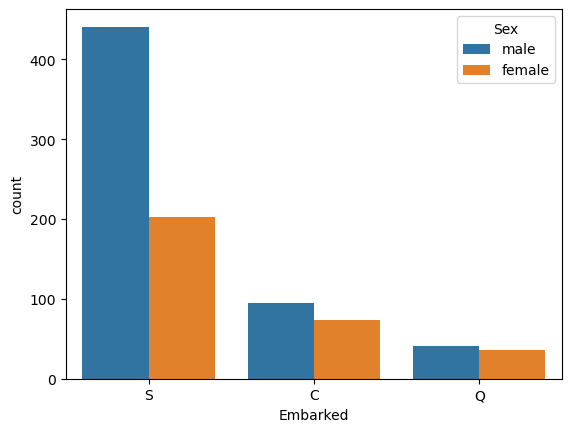

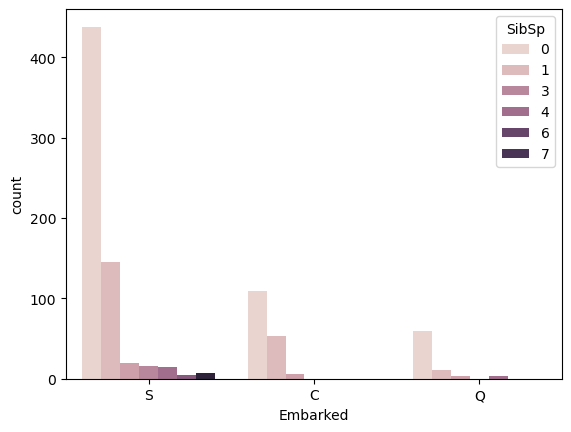

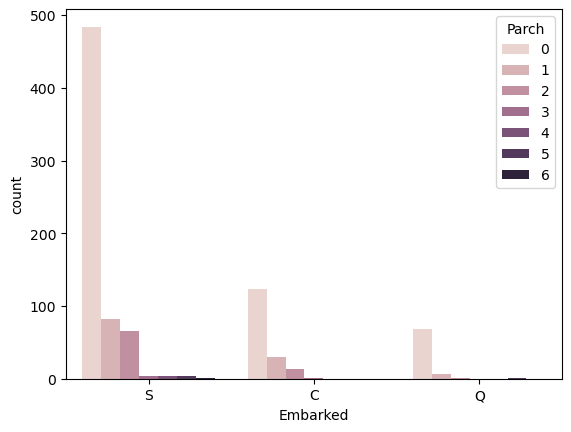

In [25]:
tmp = ['Pclass','Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.countplot(x='Embarked', hue=col, data=df_eda)

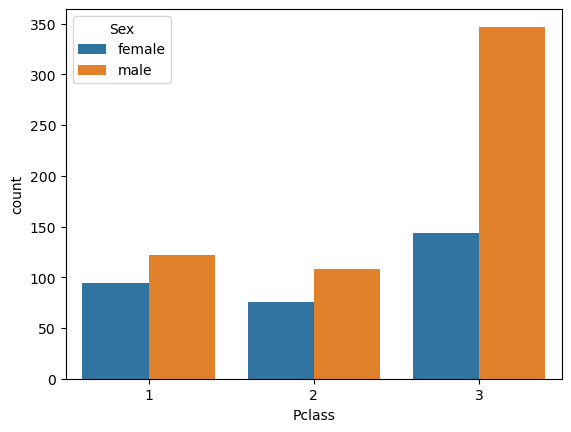

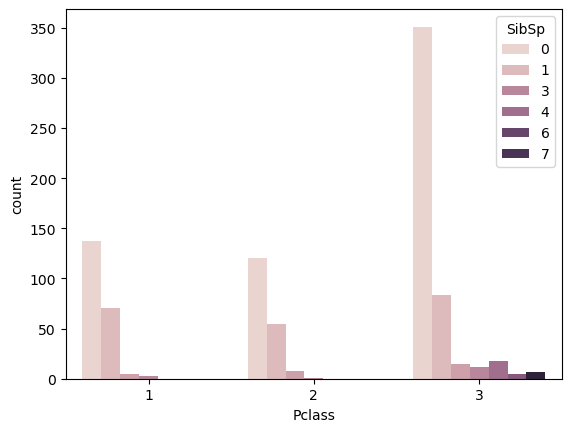

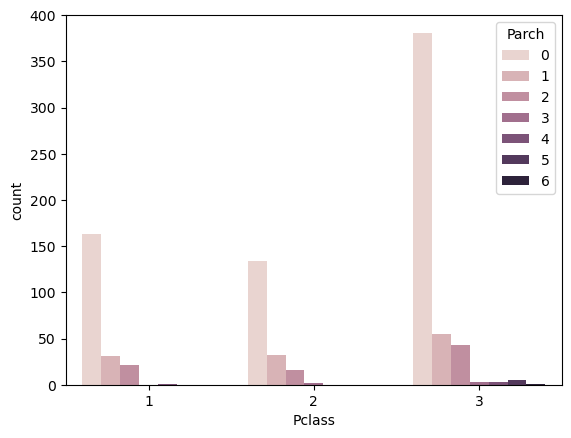

In [26]:
tmp = ['Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.countplot(x='Pclass', hue=col, data=df_eda)

Test new variable : sum of sibsp and parch

In [27]:
df_eda['Family_size'] = df_eda['SibSp'] + df_eda['Parch']

<Axes: xlabel='Family_size', ylabel='count'>

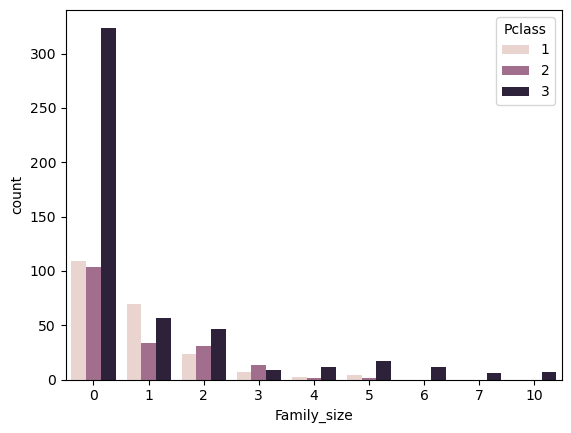

In [28]:
sns.countplot(x='Family_size', hue='Pclass', data=df_eda)

<Axes: xlabel='Embarked', ylabel='count'>

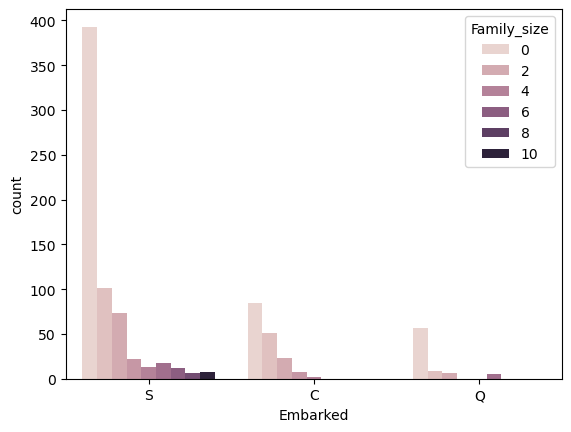

In [29]:
sns.countplot(x='Embarked', hue='Family_size', data=df_eda)

<Axes: xlabel='Family_size', ylabel='count'>

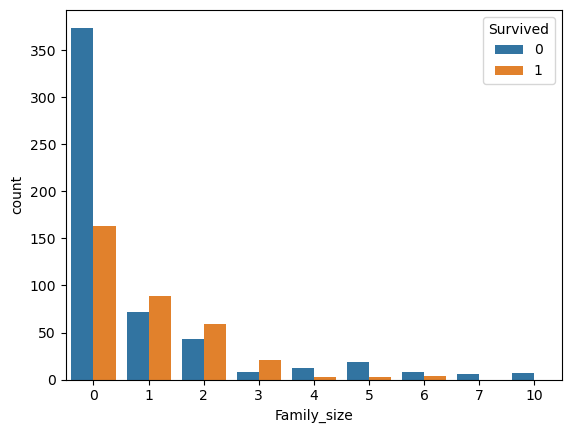

In [30]:
sns.countplot(x='Family_size', hue='Survived', data=df_eda)

#### NaN advanced

In [31]:
df_eda_age = df_eda[['Age','Survived']]
df_eda_age = df_eda_age.dropna()
df_eda_age.shape

(714, 2)

In [32]:
df_eda_age['Survived'].value_counts(normalize=True)

Survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

In [33]:
df_eda_cab = df_eda[['Cabin','Survived']]
df_eda_cab = df_eda_cab.dropna()
df_eda_cab.shape

(204, 2)

In [34]:
df_eda_cab['Survived'].value_counts(normalize=True)

Survived
1    0.666667
0    0.333333
Name: proportion, dtype: float64

In [35]:
df_eda_na = df_eda.dropna()
df_eda_na.shape

(183, 11)

In [36]:
df_eda_na['Survived'].value_counts(normalize=True)

Survived
1    0.672131
0    0.327869
Name: proportion, dtype: float64

#### Hypothesis test


In [37]:
from scipy.stats import ttest_ind, chisquare

In [38]:
df_eda['3rd_class'] = (df_eda['Pclass'] == 3)

In [39]:
df_eda['lte5yo'] = (df_eda['Age'] <= 5)
df_eda['smallFam'] = ((df_eda['Family_size'] >0) & (df_eda['Family_size'] < 4))

In [40]:
df_eda['smallFam'] = ((df_eda['Family_size'] >0) & (df_eda['Family_size'] < 4))

In [41]:
df_eda['fromS'] = (df_eda['Embarked'] == 'S')

In [42]:
#df_eda_pos = df_eda[df_eda['Survived'] == 1]

In [43]:
#df_eda_neg = df_eda[df_eda['Survived'] == 1]

In [44]:
#df_eda_pos.shape

In [45]:
#df_eda_neg.shape

In [46]:
#df_eda_neg_balenced = df_eda_neg.sample(df_eda_pos.shape[0])

In [47]:
"""
def t_test(df_pos, df_neg, col, alpha=0.05):
    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())
    if p < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'
"""

"\ndef t_test(df_pos, df_neg, col, alpha=0.05):\n    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())\n    if p < alpha:\n        return 'H0 rejected'\n    else:\n        return 'H0 not rejected (p=' + str(p) + ')'\n"

In [48]:
def x2(df, col, target='Survived', alpha=0.05):
    cross_tab = pd.crosstab(df[col].dropna(),df[target].dropna())
    stat, p = chisquare(cross_tab)
    if p[0] < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'

Passenger in 3rd class has less chance to survived

H0 : ratio of survived are the same in 3rd class than others

In [49]:
x2(df_eda,'3rd_class')

'H0 rejected'

Woomen has more chance to survived

H0 : ratio of survived is the same with men  

In [50]:
x2(df_eda, 'Sex')

'H0 rejected'

0-5 yo has more chance to survived

H0 : ratio of survived is the same with others 

In [51]:
x2(df_eda,'lte5yo')

'H0 rejected'

Passenger with [1, 3] family members has more chance to survived

H0 : ratio of survived is the same with others 

In [52]:
x2(df_eda,'smallFam')

'H0 rejected'

Passenger from S has less chance to survived

H0 : ratio of survived is the same with others 

In [53]:
x2(df_eda,'fromS')

'H0 rejected'

## Pre-processing

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest

### Step 1 : Formatting data to prepare model creation

- Train / test
- Encoding
- NaN cleaning

In [55]:
df = data.copy(deep=True)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Exclude unusable columns :

In [56]:
df = df.drop(['PassengerId','Name'],axis=1)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S

In [57]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)
print(trainset.shape)
print(testset.shape)

(668, 10)
(223, 10)


In [58]:
trainset['Survived'].value_counts(normalize=True)

Survived
0    0.613772
1    0.386228
Name: proportion, dtype: float64

In [59]:
testset['Survived'].value_counts(normalize=True)

Survived
0    0.623318
1    0.376682
Name: proportion, dtype: float64

Output proportions are similar between test and train sets.

#### Encoding variables

Here we use OrdinalEncoder because we will probably use tree modeling. But for some models it is better to use OneHotEncoder.

In [60]:
def encoding(df):
    
    dct_encoder = {}
    for col in df.select_dtypes('object'):
        dct_encoder[col] = OrdinalEncoder()
        df[col] = dct_encoder[col].fit_transform(df[[col]])

    return df, dct_encoder 

In [61]:
#trainset, encoders = encoding(trainset)
#trainset.head()

In [62]:
"""
def outliers_removing(df):
    
    ndf = df
    model = IsolationForest(contamination=0.01, random_state=0)
    not_outliers = (model.fit_predict(ndf[['Fare']]) != -1)
    ndf = ndf[not_outliers]
    
    return ndf
"""

"\ndef outliers_removing(df):\n    \n    ndf = df\n    model = IsolationForest(contamination=0.01, random_state=0)\n    not_outliers = (model.fit_predict(ndf[['Fare']]) != -1)\n    ndf = ndf[not_outliers]\n    \n    return ndf\n"

In [63]:
def feature_engineering(df):

    ndf = df
    ndf['Family_size'] = ndf['SibSp'] + ndf['Parch']
    
    ndf = ndf.drop([
        'Cabin',
        'Ticket',
        'SibSp','Parch'
    ], axis = 1)
    
    return ndf

In [192]:
def imputation(df, median_age = 29, median_embarked=2, median_fare=14.5):
    #return df.dropna(axis=0)
    #return df.fillna(-999)
    """
    ndf['isna'] = (df['Age'].isna()) | (df['Cabin'].isna())
    ndf = ndf.fillna(-999)
    return ndf
    """
    #return df.dropna(axis=0)

    # for Kaggle Submission, I am obligate to use age if I keep the column
    ndf = df
    #median_age = np.nanmedian(list(ndf['Age']))
    ndf['Age'] = ndf['Age'].fillna(median_age)
    #median_embarked = np.nanmedian(list(ndf['Embarked']))
    ndf['Embarked'] = ndf['Embarked'].fillna(median_embarked)
    #median_fare = np.nanmedian(list(ndf['Fare']))
    ndf['Fare'] = ndf['Fare'].fillna(median_fare)
    ndf['Family_size'] = ndf['Family_size'].fillna(0)
    
    return ndf

In [88]:
def preprocessing(df):
    ndf, encoders = encoding(df)
    ndf = feature_engineering(ndf)
    ndf = imputation(ndf)
    #ndf = outliers_removing(ndf)

    if 'Survived' in list(ndf.columns):
        X = ndf.drop('Survived', axis = 1)
        y = ndf['Survived']
        print(y.value_counts())
    else:
        X = ndf
        y = None
        print('No outcome')

    return X, y

In [193]:
X_train, y_train = preprocessing(trainset)

Survived
0    410
1    258
Name: count, dtype: int64


In [90]:
X_train.isna().value_counts()

Pclass  Sex    Age    Fare   Embarked  Family_size
False   False  False  False  False     False          668
Name: count, dtype: int64

In [82]:
X_test, y_test = preprocessing(testset)

Survived
0    139
1     84
Name: count, dtype: int64


### Step 2 : Improve formatting to improve model

*After first models tests*
- Feature selection
- Feature engineering
- Feature scaling -> no needed because forest models aren't sensitive to normalization 
- Outliers

In [91]:
X_train.var(axis=0)

Pclass            0.701200
Sex               0.226564
Age             168.176786
Fare           2563.601583
Embarked          0.594242
Family_size       2.838689
dtype: float64

## Modelling

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC # Normalization needed
from sklearn.neighbors import KNeighborsClassifier # Normalization needed
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #f_classif = ANOVA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [93]:
#model = DecisionTreeClassifier(random_state=0)
#model = RandomForestClassifier(random_state=0)
model = make_pipeline(
                      #PolynomialFeatures(2),
                      SelectKBest(f_classif,k=5),
                      #PCA(n_components=4),
                      RandomForestClassifier(random_state=0)
)

In [94]:
preprocessor = make_pipeline( PolynomialFeatures(degree=2, include_bias=False),SelectKBest(f_classif,k=5))

In [95]:
m_RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
m_AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
m_LinearSVC = make_pipeline(preprocessor, StandardScaler(), LinearSVC(random_state=0))
m_SVC = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
m_KNeighbors = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [96]:
dict_of_models = {
                    'RandomForest' : m_RandomForest,
                    'AdaBoost' : m_AdaBoost,
                    'LinearSVC' : m_LinearSVC,
                    'SVC' : m_SVC,
                    'KNeighbors' : m_KNeighbors,
}

### Evaluation process

In [97]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [98]:
def evaluation(model, model_name=''):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10)
                                              )
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model_name)
    plt.legend()

#### Pre modelling for preprocessing

[[125  14]
 [ 21  63]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       139
           1       0.82      0.75      0.78        84

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



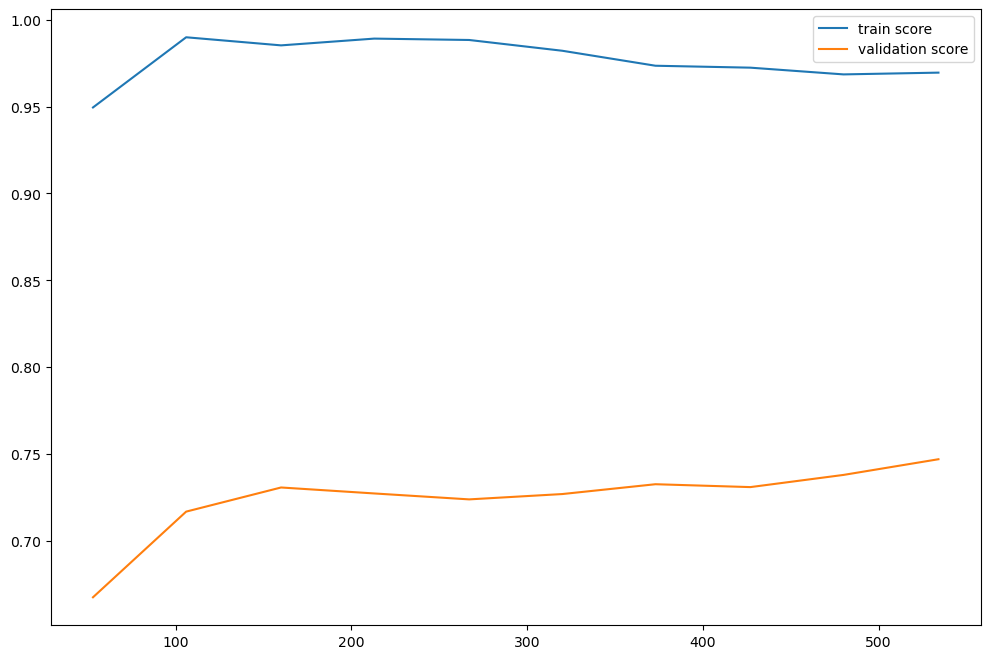

In [99]:
evaluation(model)

In [ ]:
#pd.DataFrame(model.feature_importances_, index= X_train.columns).plot.bar()

- because of it's structure, *Ticket* can be a source of overfitting.
    - yes 
- maybe merge *SibSp* and *Parch* in a Family variable ?
    - slightly better
- keep *Embarked* ?
    - no negative impact
- remove fare outliers ?
    - worst   

**Pre-Modelling Try :**

142 - 41 rows
1. DecisionTree - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
   - Overfitting : train score 100% + validation score ≈ 78%
   - accuracy 80%
2. Same - NaN fill with extrem value (-999) - same
   - Overfitting : train score 100% + validation score ≈ 70%
   - accuracy 67%
3. Same - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 68%
    - accuracy 70%
8. RandomForestClassifier - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 78%
    - accuracy 78%

Removing *Cabin* to have more data.

533 - 179 rows

4. DecisionTree - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
   - Overfitting : train score 100% + validation score ≈ 70%
   - accuracy 71%
5. Same - NaN fill with extrem value (-999) - same
   - Overfitting : train score 100% + validation score ≈ 71%
   - accuracy 67%
6. Same - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 68%
    - accuracy 73%

NB : Same if it's median age in place of -999

7. RandomForestClassifier - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
   - Overfitting : train score 100% + validation score ≈ 73%
   - accuracy 77%
9. Same - Same - columns : ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
   - Overfitting : train score 99% + validation score ≈ 73%
   - accuracy 83%

Removing *Ticket* has greatly improve accuracy.

10. Same - Same - columns : ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_size']
   - Overfitting : train score 99% + validation score ≈ 72%
   - accuracy 84%
11. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size']
   - Overfitting : train score 99% + validation score ≈ 74%
   - accuracy 83%
   - f1 0 : 86%
   - f1 1 : 78%
12. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size','smallFam']
   - Overfitting : train score 98% + validation score ≈ 72%
   - accuracy 82%
13. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','smallFam']
   - Overfitting : train score 98% + validation score ≈ 73%
   - accuracy 82%
14. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size','lte5yo']
   - Overfitting : train score 98% + validation score ≈ 71%
   - accuracy 82%
15. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + SelectKBest(5)
   - Overfitting : train score 99% + validation score ≈ 73%
   - accuracy 84%
   - f1 0 : 87%
   - f1 1 : 79%
16. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + PolynomialFeature(2) + Same
   - Overfitting : train score 83% + validation score ≈ 73%
   - accuracy 77%
   - f1 0 : 79%
   - f1 1 : 74%
17. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + PCA 2,3,4 + Same
   - all worst
17. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + Remove outliers (1%) + Same
   - Overfitting : train score 96% + validation score ≈ 72%
   - accuracy 82%
   - f1 0 : 86%
   - f1 1 : 76%
18. Same - Nan age : median + Nan embarked : median + Nan family : 0 - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + SelectKBest(5)
   - Overfitting : train score 99% + validation score ≈ 73%
   - accuracy 84%
   - f1 0 : 88%
   - f1 1 : 78%

**=> Best :** 

- n°15 : 
    - RandomForestClassifier 
    - all NaN removed 
    - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] 
    - SelectKBest(5)
- n°18 : 
    - RandomForestClassifier 
    - Nan age : median + Nan embarked : median + Nan family : 0 
    - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] 
    - SelectKBest(5)

___

#### Modelling

>>>  RandomForest
[[107  32]
 [ 19  65]]


              precision    recall  f1-score   support

           0       0.85      0.77      0.81       139
           1       0.67      0.77      0.72        84

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223

________________________________________________________________________________________________________________________ 

>>>  AdaBoost
[[112  27]
 [ 20  64]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       0.70      0.76      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



/home/jeremy/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jeremy/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jeremy/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jeremy/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

________________________________________________________________________________________________________________________ 

>>>  LinearSVC
[[114  25]
 [ 25  59]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       139
           1       0.70      0.70      0.70        84

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

________________________________________________________________________________________________________________________ 

>>>  SVC
[[115  24]
 [ 25  59]]


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

__________________________

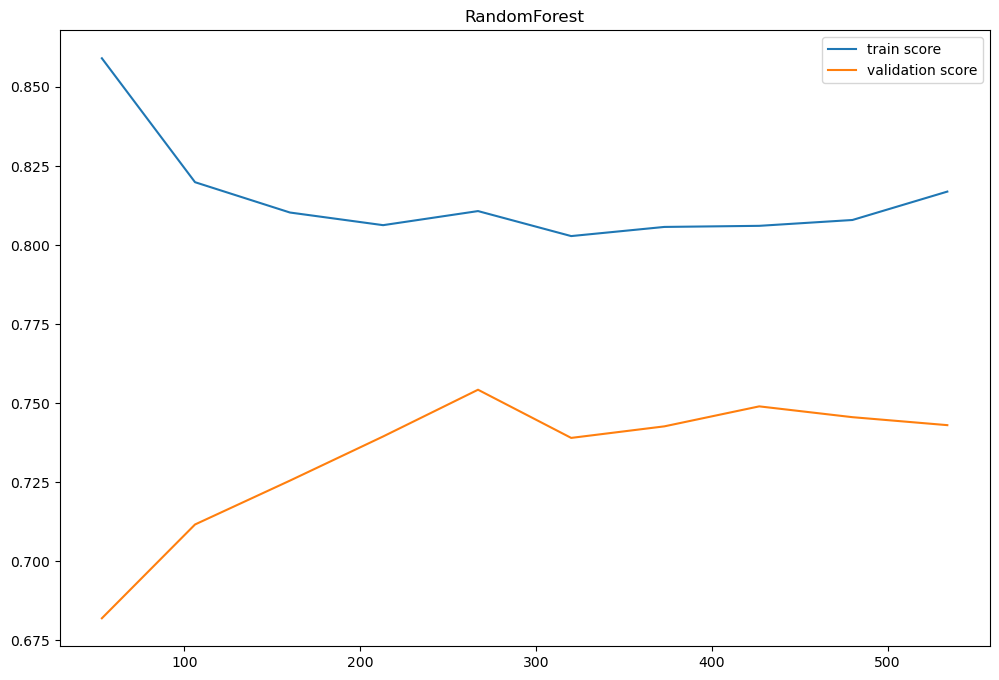

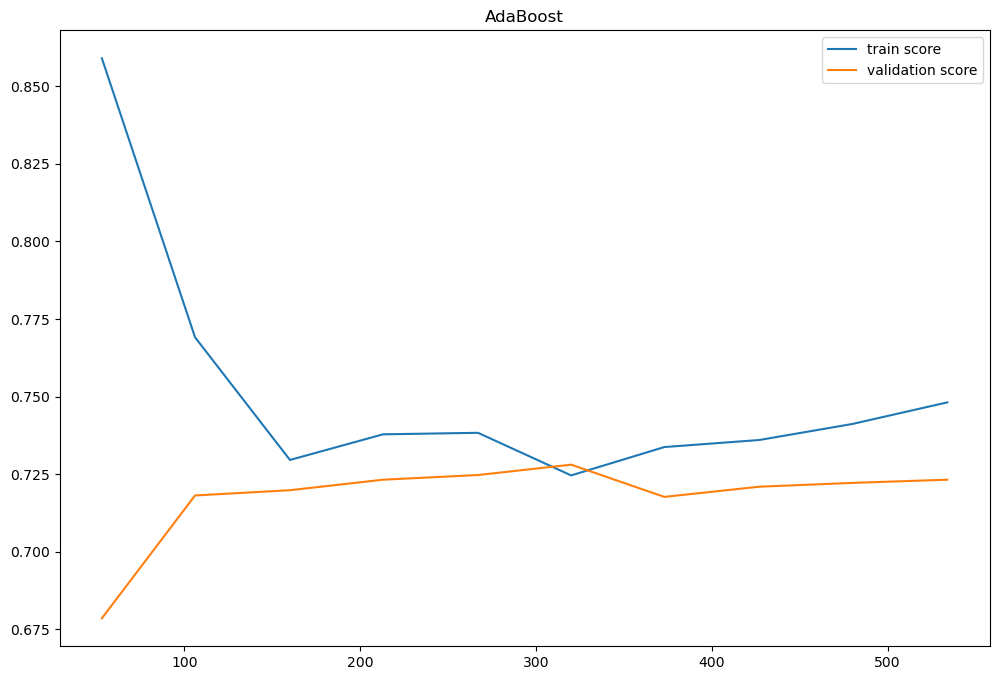

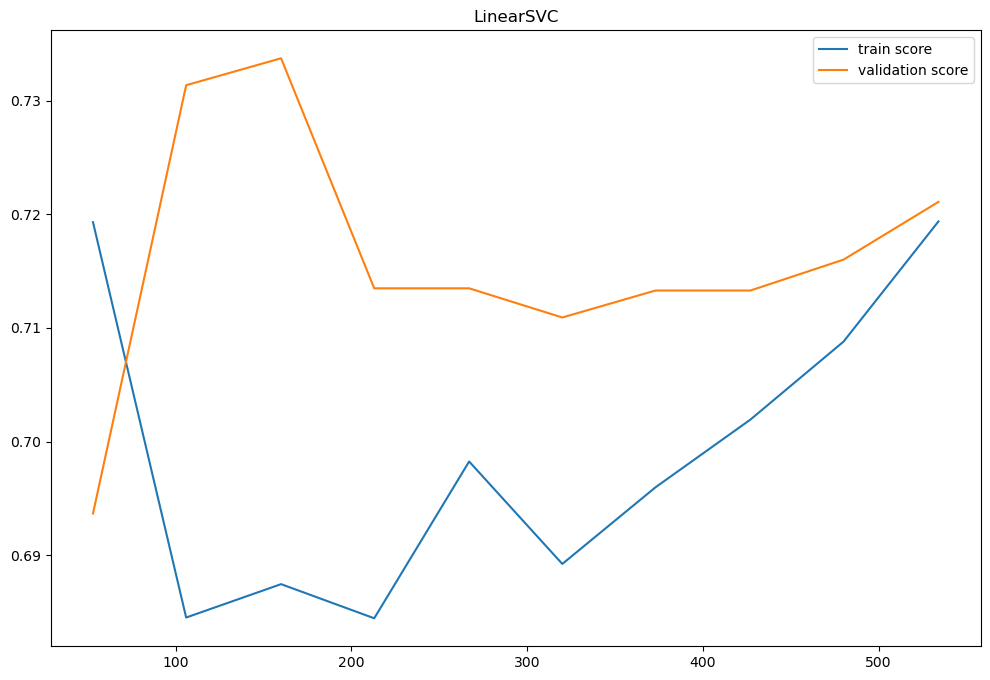

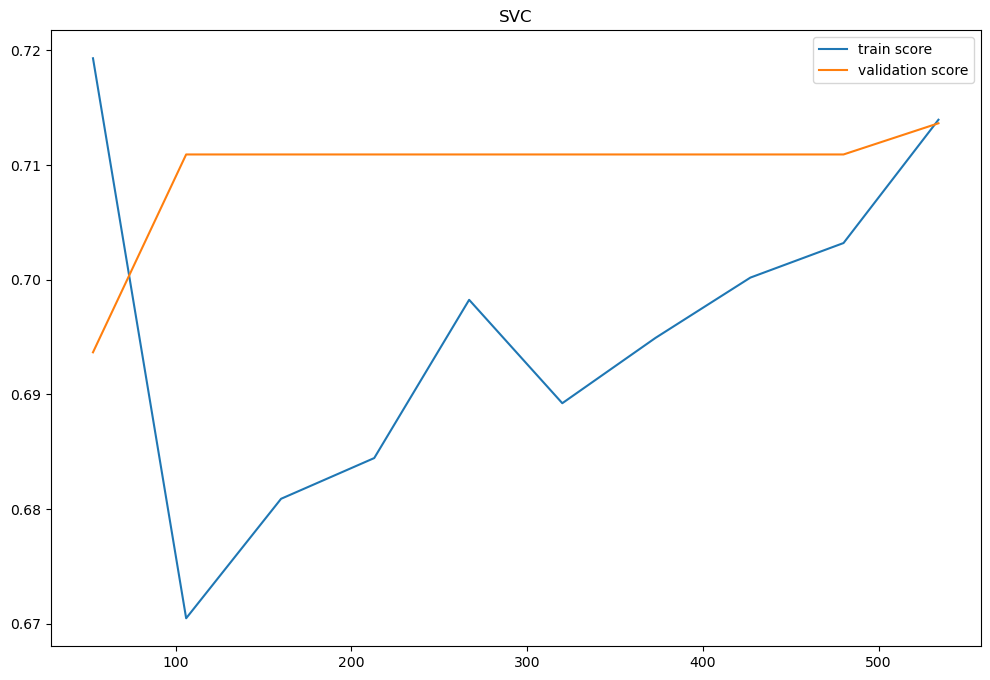

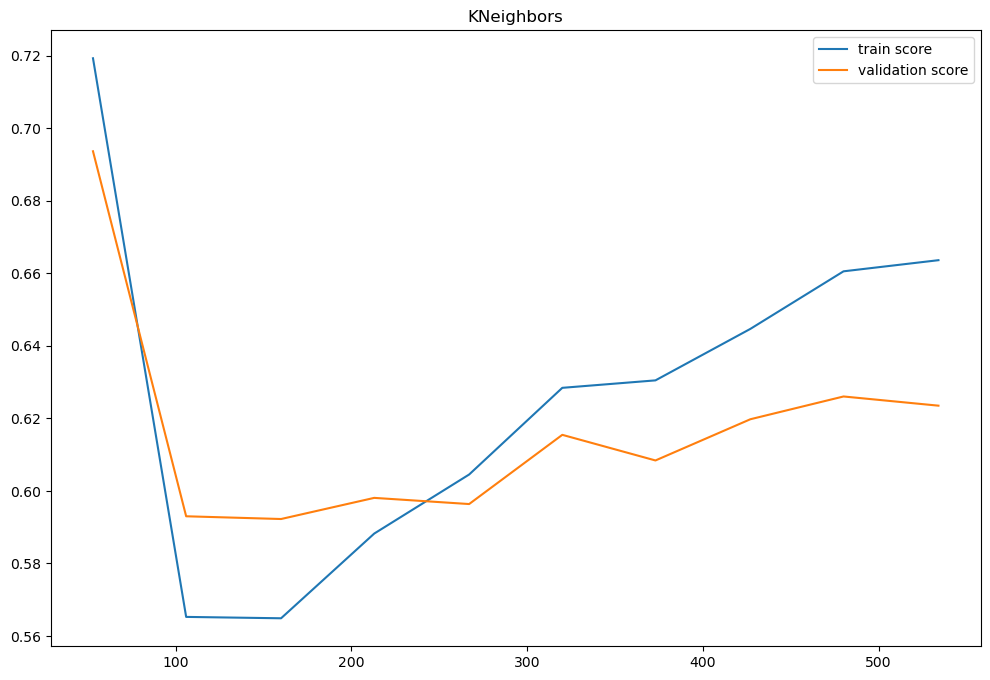

In [100]:
for name, model in dict_of_models.items():
    print('>>> ', name)
    evaluation(model, model_name=name)
    print('_'*120, '\n')

**Modelling tests :**
1. RandomForest and SVC seems to have better perfomances ; but from learning curves we can test all models putting aside LinearSVC
   - RandomForest :
       - f1 0 : 0.86
       - f1 1 : 0.76
       - accu : 0.82
       - overfitting
   - AdaBoost :
       - f1 0 : 0.82
       - f1 1 : 0.74
       - accu : 0.79
       -  Seems to converge to 0.75
   - LinearSVC : *to exclude*
       - f1 0 : 0.83
       - f1 1 : 0.76
       - accu : 0.80
       - underfitting until 350, converge around 0.725 and moove away to overfitting direction
   - SVC :
       - f1 0 : 0.87
       - f1 1 : 0.74
       - accu : 0.82
       - overfitting with augmentation of both curves
   - KNeighbors :
       - f1 0 : 0.85
       - f1 1 : 0.75
       - accu : 0.81
       - overfitting
3. 

### Models optimisation

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [102]:
m_RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [103]:
m_AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

In [104]:
m_SVC

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [105]:
m_KNeighbors

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [159]:
hp_general = {
    #'pipeline__selectkbest__k' : range(2,6+1),
    'pipeline__selectkbest__k' : [5,6],
    #'pipeline__polynomialfeatures__degree': range(1,20),
    'pipeline__polynomialfeatures__degree': [2,3],
}

In [160]:
hp_RandomForest = {
    #'randomforestclassifier__n_estimators' : [10, 25, 50, 75, 100],
    #'randomforestclassifier__n_estimators' : [50, 60, 70, 75, 80, 90, 100],
    #'randomforestclassifier__n_estimators' : [75] + list(range(90,100)),
    'randomforestclassifier__n_estimators' : range(70,75),
    #'randomforestclassifier__max_features' : ['sqrt', 'log2', None, 1, 1e-2, 1e-3, 1e-4],
    'randomforestclassifier__max_features' : [None],
    #'randomforestclassifier__criterion' : ['gini', 'entropy', 'log_loss'],
}

In [108]:
hp_AdaBoost = {
    #'adaboostclassifier__n_estimators' : [10, 25, 50, 75, 100],
    'adaboostclassifier__n_estimators' : range(120,122),
}

In [109]:
hp_SVC = {
    #'svc__C' : [1e1, 1e2, 1e3],
    'svc__C' : [1e1, 1e2],
    #'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svc__kernel' : ['poly'],
    'svc__gamma' : ['scale', 'auto', 1],
    #'svc__gamma' : ['scale', 'auto', 1e-2, 1],
}

In [110]:
hp_KNeighbors = {
    #'kneighborsclassifier__n_neighbors' : [3, 5, 10, 15],
    'kneighborsclassifier__n_neighbors' : [2, 3, 4,5],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__p' : [1, 2],
}

In [111]:
dct_hyper_params = {
    'RandomForest' : hp_RandomForest,
    'AdaBoost' : hp_AdaBoost,
    'SVC' : hp_SVC,
    'KNeighbors' : hp_KNeighbors,
}

for key in dct_hyper_params:
    dct_hyper_params[key].update(hp_general)

In [157]:
import warnings
warnings.filterwarnings('ignore')

>>>  RandomForest
{'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 73}
[[108  31]
 [ 19  65]]


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       139
           1       0.68      0.77      0.72        84

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

________________________________________________________________________________________________________________________ 

>>>  AdaBoost
{'adaboostclassifier__n_estimators': 121, 'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6}
[[114  25]
 [ 22  62]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       139
           1       0.71      0.74      0.73        84

    accuracy           

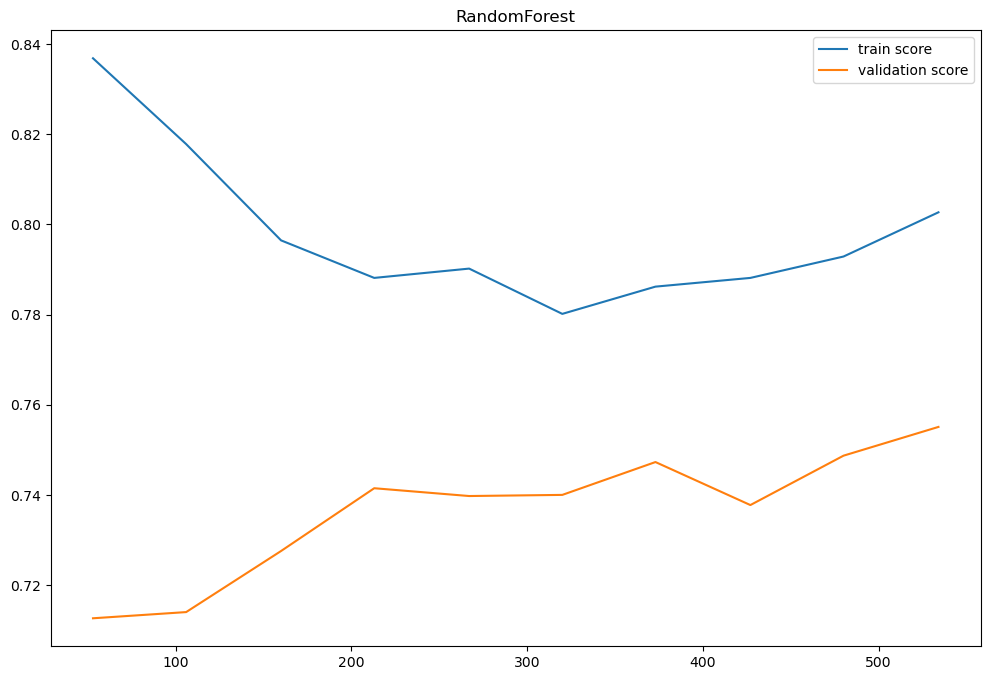

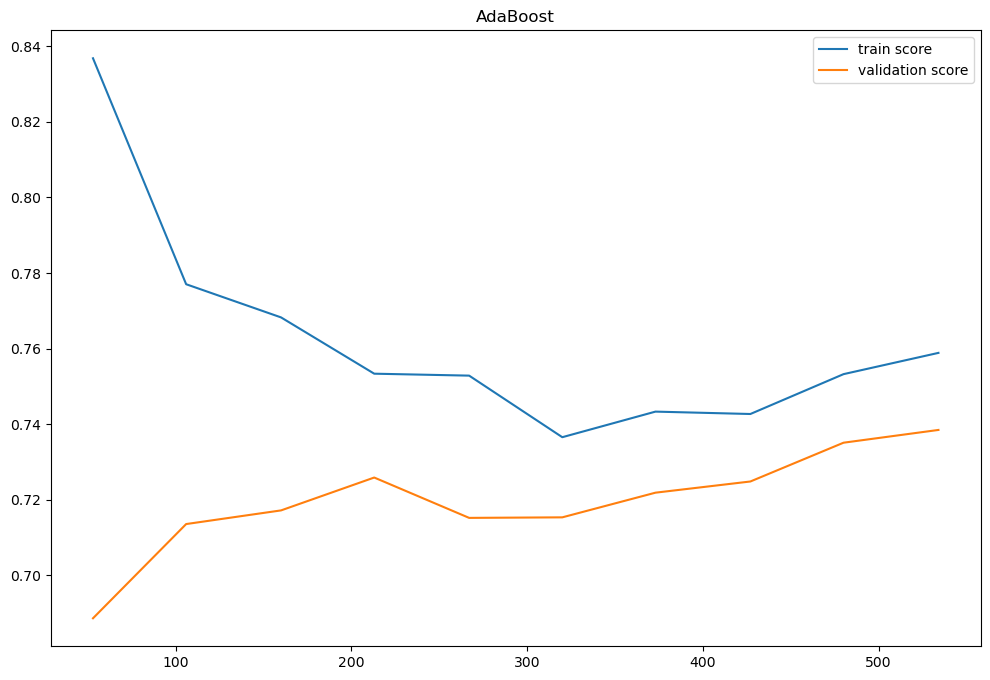

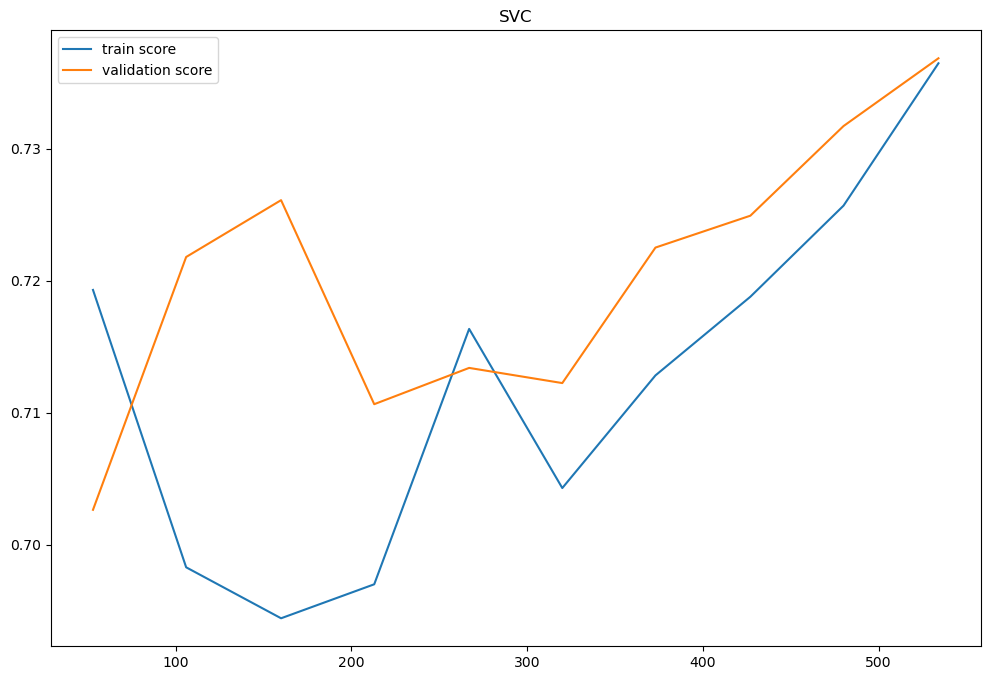

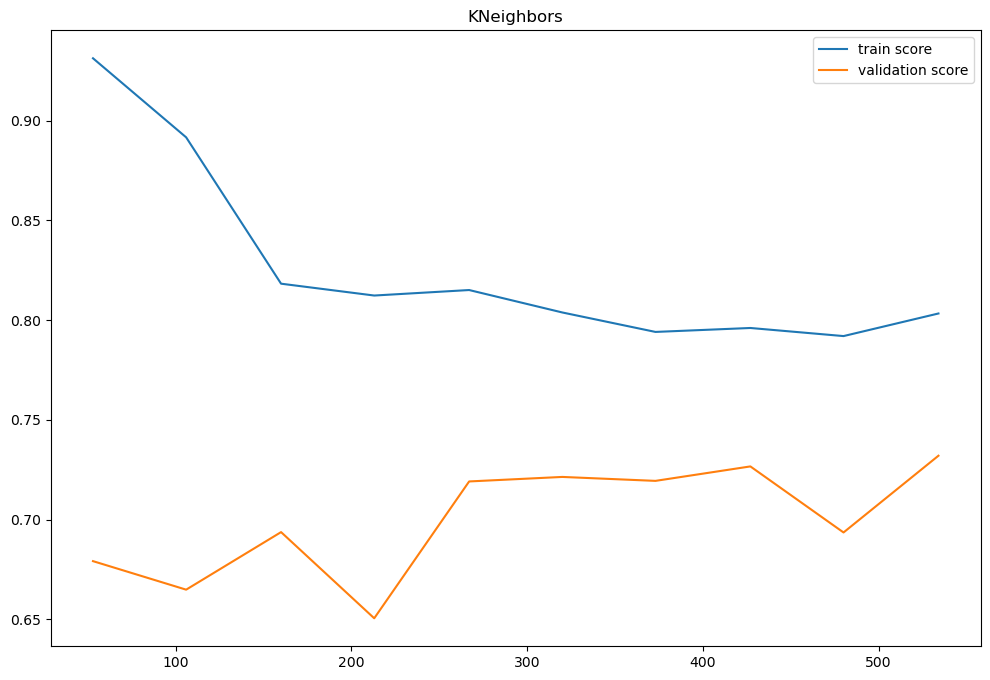

In [161]:
dct_best_estim = {}
for name, hp in dct_hyper_params.items():
    model = dict_of_models[name]
    
    print('>>> ', name)
    
    grid = GridSearchCV(model, hp, scoring='f1', cv=5)
    #grid = RandomizedSearchCV(model, hp, scoring='f1', cv=5, n_iter=30)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    dct_best_estim[name] = grid

    #y_pred = grid.predict(X_test)
    #print(classification_report(y_test, y_pred)

    evaluation(grid.best_estimator_, model_name=name)
    
    print('_'*120, '\n')

**Modelling optimisation :**

0. RandomForest and SVC seems to have better perfomances ; but from learning curves we can test all models putting aside LinearSVC
   - RandomForest :
       - f1 0 : 0.86
       - f1 1 : 0.76
       - accu : 0.82
       - overfitting
   - AdaBoost :
       - f1 0 : 0.82
       - f1 1 : 0.74
       - accu : 0.79
       -  Seems to converge to 0.75
   - LinearSVC : *to exclude*
       - f1 0 : 0.83
       - f1 1 : 0.76
       - accu : 0.80
       - underfitting until 350, converge around 0.725 and moove away to overfitting direction
   - SVC :
       - f1 0 : 0.87
       - f1 1 : 0.74
       - accu : 0.82
       - overfitting with augmentation of both curves
   - KNeighbors :
       - f1 0 : 0.85
       - f1 1 : 0.75
       - accu : 0.81
       - overfitting
       
1. *Scoring on f1*
   - RandomForest :
       - f1 0 : 0.87
       - f1 1 : 0.79
       - accu : 0.84
       - similar, overfitting
       - best params : {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 75}
   - AdaBoost :
       - f1 0 : 0.84
       - f1 1 : 0.77
       - accu : 0.81
       - similar
       - best params : {'adaboostclassifier__n_estimators': 50}
   - SVC : 
       - f1 0 : ~~0.84~~ -> 0.84
       - f1 1 : ~~0.72~~ -> 0.74
       - accu : ~~0.79~~ -> 0.80
       - best params : {'svc__C': ~~1000.0~~ 100.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
         
        **Warning SVC :** maybe due to bias (because of a high C), the higher C is always selected but all score always lower

   - KNeighbors :
       - f1 0 : 0.85
       - f1 1 : 0.77
       - accu : 0.82
       - similar, overfitting
       - best params : {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
2. *Scoring on accuracy* : all identical else KNN with 4 n_neigbhors with :
    - f1 0 : 0.86
    - f1 1 : 0.74
    - accu : 0.82
3. Adding SelectKBest to grid search :
   - RandomForest :
       - same
       - best params : {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 75, 'pipeline__selectkbest__k': 5}
   - AdaBoost :
       - same
       - best params : {'adaboostclassifier__n_estimators': 50, 'pipeline__selectkbest__k': 5}
   - SVC : 
       - f1 0 : 0.85
       - f1 1 : 0.76
       - accu : 0.82
       - trains ≈ 0.85 ; valid ≈ 0.74
       - best params : {'svc__C': 100.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'pipeline__selectkbest__k': 6}
   - KNeighbors :
       - same
       - best params : {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform', 'pipeline__selectkbest__k': 5}

4. Adding PolynomialFeatures in gridsearch CV : No overfitting but slightly worst score
   - RandomForest :
       - f1 0 : 0.78
       - f1 1 : 0.73
       - accu : 0.76
       - trains ≈ 0.82 ; valid ≈ 0.75
       - best params : {'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 75}
   - AdaBoost :
       - f1 0 : 0.82
       - f1 1 : 0.75
       - accu : 0.79
       - trains ≈ 0.77 ; valid ≈ 0.72
       - best params : {'adaboostclassifier__n_estimators': 100, 'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6}
   - SVC : 
       - f1 0 : 0.81
       - f1 1 : 0.73
       - accu : 0.78
       - trains ≈ 0.7475 ; valid ≈ 0.7375
       - best params : {'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'svc__C': 10.0, 'svc__gamma': 'scale'}
   - KNeighbors :
       - f1 0 : 0.83
       - f1 1 : 0.77
       - accu : 0.80
       - trains ≈ 0.79 ; valid ≈ 0.75
       - best params : {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform', 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 5}

5. Opti with RandomizedGrid + GridSearch
   - RandomForest :
       - f1 0 : 0.78
       - f1 1 : 0.73
       - accu : 0.76
       - trains ≈ 0.82 ; valid ≈ 0.76
       - best params : {'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 75}
   - AdaBoost :
       - f1 0 : 0.83
       - f1 1 : 0.76
       - accu : 0.80
       - trains ≈ 0.77 ; valid ≈ 0.72
       - best params : {'adaboostclassifier__n_estimators': 120, 'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6}
   - SVC : 
       - f1 0 : 0.81
       - f1 1 : 0.73
       - accu : 0.78
       - converge to 0.74
       - best params : {'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'svc__C': 10.0, 'svc__gamma': 1, 'svc__kernel': 'poly'}
   - KNeighbors :
       - f1 0 : 0.83
       - f1 1 : 0.77
       - accu : 0.80
       - trains ≈ 0.80 ; valid ≈ 0.75
       - best params : {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform', 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 5}

6. After replacing NaN for Kaggle submissions : 
   - RandomForest :
       - f1 0 : 0.81
       - f1 1 : 0.72
       - accu : 0.78
       - trains ≈ 0.80 ; valid ≈ 0.75
       - best params : {'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 73}
   - AdaBoost :
       - f1 0 : 0.83
       - f1 1 : 0.73
       - accu : 0.79
       - trains ≈ 0.76 ; valid ≈ 0.73
       - best params : {'adaboostclassifier__n_estimators': 121, 'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 6}
   - SVC : 
       - f1 0 : 0.83
       - f1 1 : 0.71
       - accu : 0.78
       - converge to 0.735
       - best params : {'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 5, 'svc__C': 10.0, , 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
   - KNeighbors :
       - f1 0 : 0.88
       - f1 1 : 0.67
       - accu : 0.80
       - trains ≈ 0.80 ; valid ≈ 0.735 
       - best params : {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance', 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 5}

#### Stacking Classifier

In [113]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [163]:
dct_best_estim['SVC']

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=5))])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [2, 3],
                         'pipeline__selectkbest__k': [5, 6],
                         'svc__C': [10.0, 100.0],
                         'svc__gamma': ['scale', 'auto', 1],
                         'svc__kernel': ['poly']},
             scoring='f1')

In [164]:
dct_opti_models = {}
for name, grid in dct_best_estim.items():
    dct_opti_models[name] = grid.best_estimator_

In [165]:
ndom = dict((k,dct_opti_models[k]) for k in ('RandomForest','AdaBoost') if k in dct_opti_models)

[[112  27]
 [ 20  64]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       0.70      0.76      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



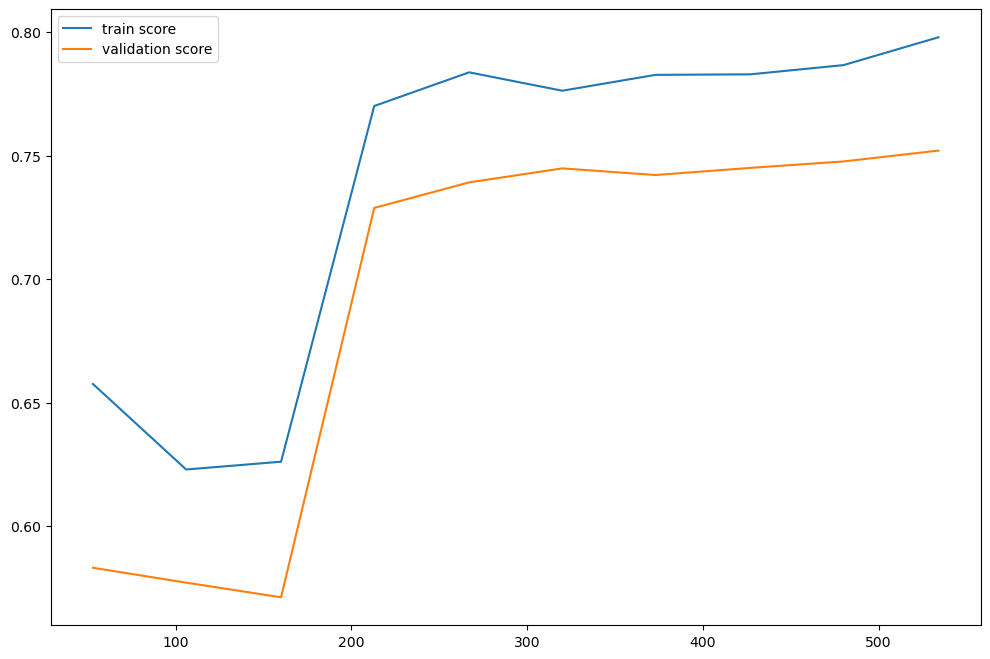

In [166]:
#m_StackingClassifier = StackingClassifier(list(dct_opti_models.items()), final_estimator=None)
#evaluation(m_StackingClassifier)
m_StackingClassifier = StackingClassifier(list(ndom.items()), final_estimator=None)
evaluation(m_StackingClassifier)

In [167]:
m_StackingClassifier

StackingClassifier(estimators=[('RandomForest',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('polynomialfeatures',
                                                                  PolynomialFeatures(degree=3,
                                                                                     include_bias=False)),
                                                                 ('selectkbest',
                                                                  SelectKBest(k=6))])),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(max_features=None,
                                                                        n_estimators=73,
                                                                        random_state=0))])),
                               ('AdaBoost',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('polynomialfeatures',
                                                                  PolynomialFeatures(degree=3,
                                                                                     include_bias=False)),
                                                                 ('selectkbest',
                                                                  SelectKBest(k=6))])),
                                                ('adaboostclassifier',
                                                 AdaBoostClassifier(n_estimators=121,
                                                                    random_state=0))]))])

{'cv': None, 'final_estimator': LogisticRegression(random_state=0), 'final_estimator__C': 1, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'saga', 'stack_method': 'auto'}
[[112  27]
 [ 20  64]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       0.70      0.76      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



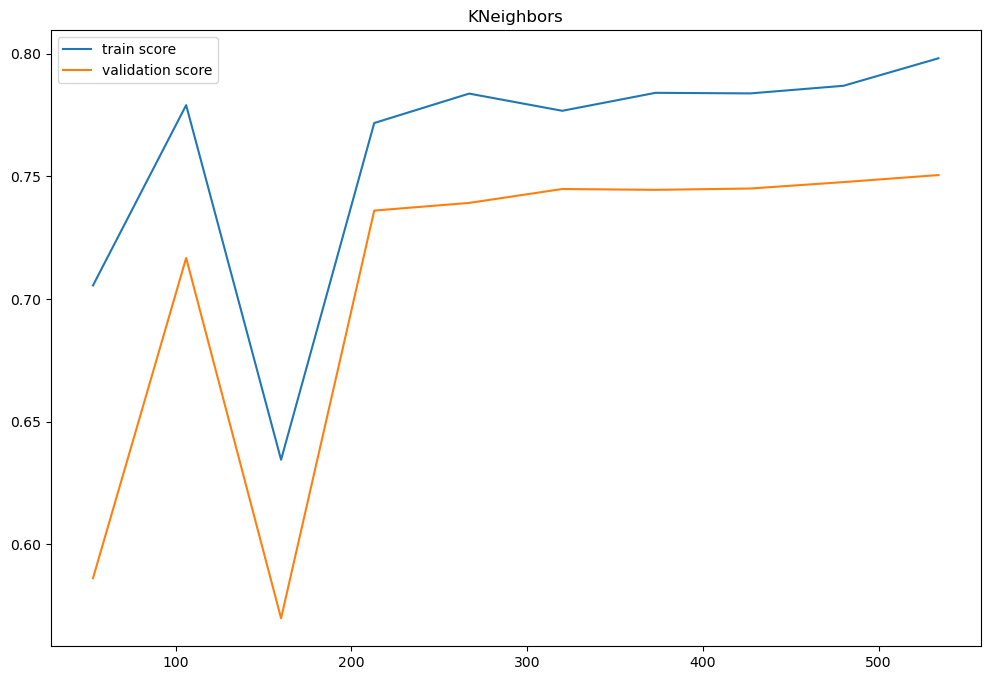

In [170]:
hp = {
    'final_estimator' : [LogisticRegression(random_state=0)],
    'cv' : [None,4],
    #'stack_method' : ['auto','predict_proba', 'decision_function', 'predict'],
    'stack_method' : ['auto'],
    'final_estimator__penalty' : ['l1', 'l2','elasticnet'],
    'final_estimator__C' : [1, 10],
    #'final_estimator__solver': ['lbfgs', 'liblinear','saga'],
    'final_estimator__solver': ['saga'],
}


grid = GridSearchCV(m_StackingClassifier, hp, scoring='f1', cv=5)
#grid = RandomizedSearchCV(m_StackingClassifier, hp, scoring='f1', cv=5, n_iter=50)


grid.fit(X_train, y_train)
print(grid.best_params_)

evaluation(grid.best_estimator_, model_name=name)

**Stacking model try :**

*RandomForest, AdaBoost, SVC, KNeighbors*
1. Default
   - f1 0 : 0.82
   - f1 1 : 0.75
   - accu : 0.79
   - trains ≈ 0.77 ; valid ≈ 0.73
2. Grid :
   - f1 0 : 0.82
   - f1 1 : 0.75
   - accu : 0.79
   - trains ≈ 0.765 ; valid ≈ 0.745
   - best_params : {'cv': 4, 'final_estimator': None} => None = LogisticRegression
3. Grid :
   - f1 0 : 0.82
   - f1 1 : 0.75
   - accu : 0.79
   - trains ≈ 0.765 ; valid ≈ 0.745
   - best_params : {'cv': 4, 'final_estimator': None, 'stack_method': 'predict'} => None = LogisticRegression

*AdaBoost, KNeighbors* or all ? Error in code 

4. Grid :
   - f1 0 : 0.83
   - f1 1 : 0.77
   - accu : 0.80
   - trains ≈ 0.76 ; valid ≈ 0.75
   - best_params : {'cv': None, 'final_estimator': None, 'stack_method': 'auto'}
5. Grid on LogisitcRegression too:
   - f1 0 : 0.82
   - f1 1 : 0.75
   - accu : 0.79
   - converge to 0.75
   - best_params : {'cv': 4, 'final_estimator': LogisticRegression(random_state=0), 'final_estimator__C': 1, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'liblinear', 'stack_method': 'predict'}

*AdaBoost, KNeighbors*

6. Grid :
   - f1 0 : 0.83
   - f1 1 : 0.77
   - accu : 0.80
   - trains ≈ 0.76 ; valid ≈ 0.75
   - best_params : {'cv': None, 'final_estimator': LogisticRegression(random_state=0), 'final_estimator__C': 1, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'liblinear', 'stack_method': 'auto'}

**~~Conclusion :~~**

Stacked Classifier with AdaBoost and KNeighbors is slighly better with default parameters because of the balance maximization between train and validation score and with the same f1 scores than KNN (best in solo).

*Kaggle submit need to include NaN age. Some modification have been done and modification in trained model*

*RandomForest, AdaBoost*

7. Grid :
   - f1 0 : 0.83
   - f1 1 : 0.73
   - accu : 0.79
   - trains ≈ 0.8 ; valid ≈ 0.75
   - best_params : {'cv': None, 'final_estimator': LogisticRegression(random_state=0), 'final_estimator__C': 1, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'saga', 'stack_method': 'auto'}

**Conclusion :**
Stacked Classifier with RandomForest and AdaBoost is slighly better with theirs parameters because AdaBoost had the best balanced performance and RandomForest help to slightly increase validation score.

### Precision Recall Curve

In [171]:
from sklearn.metrics import precision_recall_curve, accuracy_score

In [172]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

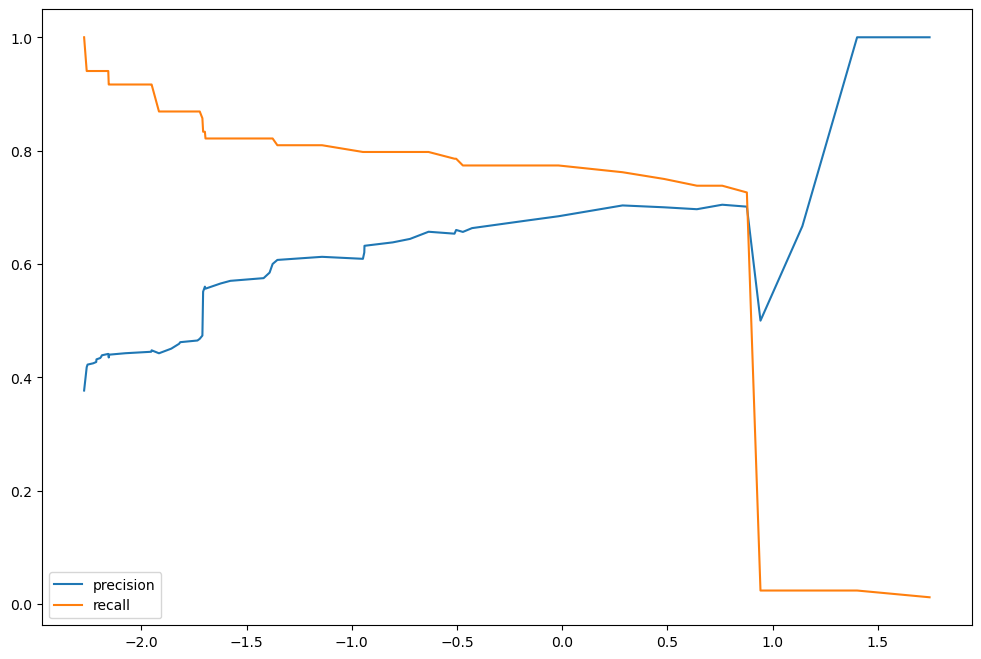

In [173]:
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [174]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [180]:
y_pred = final_model(grid.best_estimator_, X_test, threshold=0.8)

In [181]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7134502923976608
0.7802690582959642


In [177]:
y_pred = final_model(grid.best_estimator_, X_test, threshold=0)

In [178]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7314285714285714
0.7892376681614349


In [179]:
best_ac = 0
best_t = None
for i in range(-190,150):
    t = i / 100
    y_pred = final_model(grid.best_estimator_, X_test, threshold=t)
    ac = accuracy_score(y_test, y_pred)
    if ac >= best_ac :
        best_ac = ac
        best_t = t
print(str(best_t) + ' : ' + str(best_ac))

0.28 : 0.7892376681614349


**Multiple best thresholds :** keeping 0.28

## Construct CSV for Kaggle answer

In [194]:
df_eval =  pd.read_csv('data/test.csv')
print(len(df_eval.index))
df_eval

418


PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [195]:
X_eval_wid, y_eval = preprocessing(df_eval)
X_eval = X_eval_wid.drop(['PassengerId','Name'],axis=1)
print(len(X_eval.index))
X_eval.head()

No outcome
418


Pclass  Sex   Age     Fare  Embarked  Family_size
0       3  1.0  34.5   7.8292       1.0            0
1       3  0.0  47.0   7.0000       2.0            1
2       2  1.0  62.0   9.6875       1.0            0
3       3  1.0  27.0   8.6625       2.0            0
4       3  0.0  22.0  12.2875       2.0            2

In [196]:
y_pred = final_model(grid.best_estimator_, X_eval, threshold=0.28)
print(len(y_pred))
#y_pred

418


array([False,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,

In [197]:
y_pred = y_pred.astype(int)

In [198]:
list_pid = X_eval_wid['PassengerId'].to_numpy()

In [199]:
data = {
    'PassengerId':list_pid,
    'Survived':y_pred
}
df_answer = pd.DataFrame.from_dict(data)
df_answer

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
36           928         1
37           929         1
38           930         0
39           931         0
40           932         0
41           933         0
42           934         0
43           935         1
44           936         1
45           937         0
46           938         0
47           939         0
48           940         1
49           941         1
50           942         0
51           943         0
52           944         1
53           945         1
54           946         0
55           947         0
56           948         0
57           949         0
58           950         0
59           951         1
60           952         0
61           953         0
62           954         0
63           955         1
64           956         1
65           957         1
66           958         1
67           959         0
68           960         0
69           961         1
70           962         1
71           963         0
72           964         1
73           965         1
74           966         1
75           967         0
76           968         0
77           969         1
78           970         0
79           971         1
80           972         1
81           973         0
82           974         1
83           975         0
84           976         0
85           977         0
86           978         1
87           979         1
88           980         1
89           981         1
90           982         1
91           983         0
92           984         1
93           985         0
94           986         1
95           987         0
96           988         1
97           989         0
98           990         1
99           991         0
100          992         1
101          993         0
102          994         0
103          995         0
104          996         1
105          997         0
106          998         0
107          999         0
108         1000         0
109         1001         0
110         1002         0
111         1003         1
112         1004         1
113         1005         1
114         1006         1
115         1007         0
116         1008         0
117         1009         1
118         1010         1
119         1011         1
120         1012         1
121         1013         0
122         1014         1
123         1015         0
124         1016         0
125         1017         1
126         1018         0
127         1019         1
128         1020         0
129         1021         0
130         1022         0
131         1023         1
132         1024         1
133         1025         0
134         1026         0
135         1027         0
136         1028         0
137         1029         0
138         1030         1
139         1031         0
140         1032         1
141         1033         1
142         1034         0
143         1035         0
144         1036         1
145         1037         0
146         1038         0
147      

In [200]:
df_answer.to_csv('data/answer.csv', index=False)


___

**Final Kaggle Score:** 0.75598